<a href="https://colab.research.google.com/github/R1013-T/python-school/blob/main/1031_python_school.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# スクレイピング

In [16]:
!apt install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
from bs4 import BeautifulSoup

html = """
<!DOCTYPE html>
<html>
    <head>
        <title>Page Title</title>
    </head>
    <body>
        <h1 class="one" >H1_String</h1>
        <p>おすすめ商品</p>
        <div class="description">
            <p>とってもキュートな商品。</p>
        </div>
    </body>
</html>

"""
soup = BeautifulSoup(html, "html.parser")

# 最初のh1タグ取得
h1 = soup.h1
print(h1)  # <h1 class="one">H1_String</h1>

# h1タグの属性を取得
print(h1.attrs) # {'class': ['one']}

# h1タグのclassを取得
print(h1['class'])  # ['one']

# h1タグのタグ名を取得
print(h1.name) # h1

# 最初のpタグ取得
print(soup.p) # <p>おすすめ商品</p>

# divタグの次のpタグ取得
print(soup.div.p) # <p>とってもキュートな商品。</p>

# divタグの次のpタグの内部テキストを取得
print(soup.div.p.string) # とってもキュートな商品。

# selectを使った例
print(soup.select('body div p')[0].string)

<h1 class="one">H1_String</h1>
{'class': ['one']}
['one']
h1
<p>おすすめ商品</p>
<p>とってもキュートな商品。</p>
とってもキュートな商品。
とってもキュートな商品。


In [29]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.z2yFO1018d/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.lNsq1cSsda/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.VQdMU6IsTd/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [18]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service as ChromeService

options = webdriver.ChromeOptions()
options.add_argument("--headless") # or use pyvirtualdiplay
options.add_argument("--no-sandbox") # needed, because colab runs as root

options.headless = True
service = ChromeService(executable_path="/usr/bin/chromedriver")
driver = webdriver.Chrome(service=service, options=options)

url = 'https://www.yahoo.co.jp/'

driver.get(url)
driver.save_screenshot("test.png")
driver.quit()

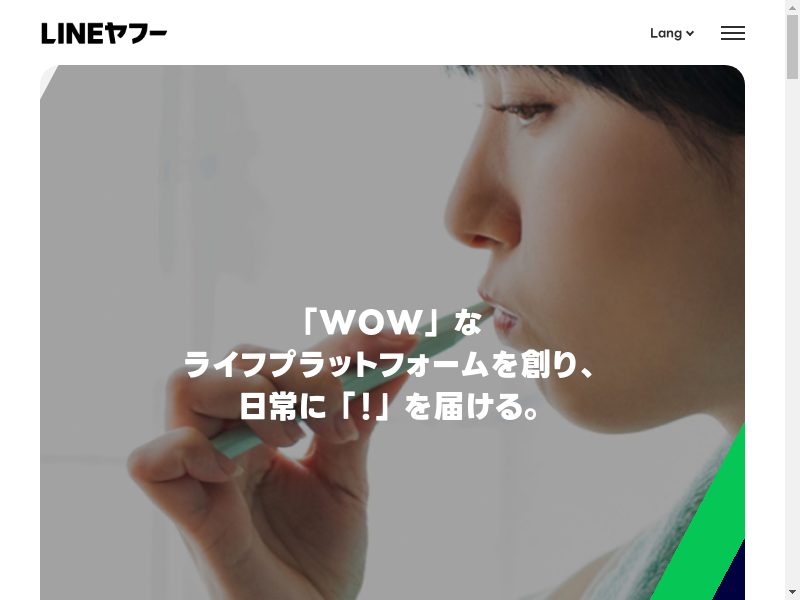

In [19]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service as ChromeService

from IPython.display import Image, display

options = webdriver.ChromeOptions()
options.add_argument("--headless") # or use pyvirtualdiplay
options.add_argument("--no-sandbox") # needed, because colab runs as root

options.headless = True
service = ChromeService(executable_path="/usr/bin/chromedriver")
driver = webdriver.Chrome(service=service, options=options)

url = 'https://www.lycorp.co.jp/ja/'

driver.get(url)
driver.save_screenshot("test.png")
display(Image('test.png'))
driver.quit()

In [20]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service as ChromeService

options = webdriver.ChromeOptions()
options.add_argument("--headless") # or use pyvirtualdiplay
options.add_argument("--no-sandbox") # needed, because colab runs as root

options.headless = True
service = ChromeService(executable_path="/usr/bin/chromedriver")
driver = webdriver.Chrome(service=service, options=options)

url = 'https://www.yahoo.co.jp/'
driver.get(url)
data = driver.page_source.encode('utf-8')
soup = BeautifulSoup(data,'html.parser')
soup = soup.find(id = 'tabpanelTopics1')
links = soup.select('article h1 span')

for a in links:
    print(a.contents[0])

中継 日銀・植田総裁が会見
2年ぶり冬の節電要請せず 経産相
きれいな水尽きた ガザ現状に警告
立てこもりの男 郵便局内で発砲か
豚肉国産と偽る 給食で10年超提供
ドライヤーから爆発音 一部不具合
ヤクルト 吉田、奥村らに戦力外
テレ朝「裸の少年」終了 新番組に
遅咲きの満開


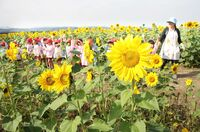

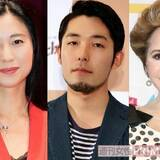

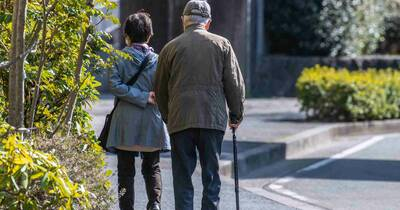

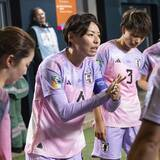

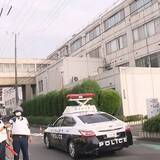

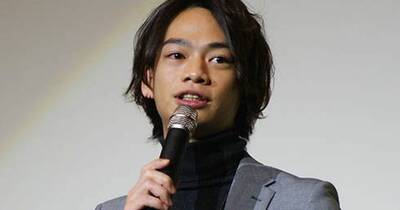

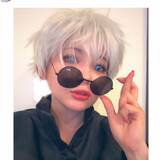

In [31]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service as ChromeService
import requests

options = webdriver.ChromeOptions()
options.add_argument("--headless") # or use pyvirtualdiplay
options.add_argument("--no-sandbox") # needed, because colab runs as root

options.headless = True
service = ChromeService(executable_path="/usr/bin/chromedriver")
driver = webdriver.Chrome(service=service, options=options)

url = 'https://www.yahoo.co.jp/'
driver.get(url)
data = driver.page_source.encode('utf-8')
soup = BeautifulSoup(data,'html.parser')
images = soup.find_all("img", limit=10)

for i,img in enumerate(images, start=1):
  src  = img.get("src")
  responce = requests.get(src)
  with open("{}.jpg".format(i), "wb") as f:
    f.write(responce.content)
    display(Image(f"{i}.jpg"))

In [32]:
# 画像処理